In [ ]:
%%bash 
catalyst ingest-exchange -x binance -i ltc_usdt -f minute


In [1]:
%%bash 
catalyst ingest-exchange -x binance -i xrp_usdt -f minute
catalyst ingest-exchange -x binance -i btc_usdt -f minute
catalyst ingest-exchange -x binance -i eth_usdt -f minute
catalyst ingest-exchange -x binance -i bnb_usdt -f minute
catalyst ingest-exchange -x binance -i eos_usdt -f minute
catalyst ingest-exchange -x binance -i neo_usdt -f minute
catalyst ingest-exchange -x binance -i trx_usdt -f minute
catalyst ingest-exchange -x binance -i ltc_usdt -f minute


Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance


In [2]:
%%bash 
catalyst ingest-exchange -x binance -i xrp_btc -f minute
catalyst ingest-exchange -x binance -i eth_btc -f minute
catalyst ingest-exchange -x binance -i bnb_btc -f minute
catalyst ingest-exchange -x binance -i eos_btc -f minute
catalyst ingest-exchange -x binance -i neo_btc -f minute
catalyst ingest-exchange -x binance -i trx_btc -f minute
catalyst ingest-exchange -x binance -i ltc_btc -f minute


Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance
Trying to ingest exchange bundle binance...
Ingesting minute price data on binance


In [ ]:
# start terminal from anaconda/environments/catalyst
# in terminal the catalyst environment should be active, which can be checked by conda info --all
# jupyter lab work doesn't work as it doesn't switch to the catalyst environment
# start jupyter notebook by: jupyter notebook
%load_ext catalyst
# required to activate catalyst magic words 


# Setup matplotlib to display graphs inline in this Notebook
%matplotlib inline


In [ ]:
import pixiedust
pixiedust.optOut()

# magic line to be inserted as first line of cell
# %%pixie_debugger



Recognizing crypto samples

An example showing how the scikit-learn can be used to classify crypto sell/buy actions.



classifier loaded from /Users/tc/tf_models/crypto/xrp_usdt.pydata
2019-03-06 19:42:00.137642: processing xrp_usdt
2019-03-06 19:42:00.137764: read tf vectors with 428161 tics x 6 aggregations from /Users/tc/Features/xrp_usdt.msg
xrp_usdt CPC total: before sequence reduction: buy 7548 sell 7548 hold 413065
train: after  balancing: buy 4267 sell 4267 hold 4267
val: after  balancing: buy 2698 sell 2698 hold 2698
test: after  balancing: buy 298 sell 298 hold 298
xrp_usdt 1 total: before sequence reduction: buy 4761 sell 190257 hold 233143
train: after  balancing: buy 2813 sell 2813 hold 2813
val: after  balancing: buy 1656 sell 1656 hold 1656
test: after  balancing: buy 123 sell 123 hold 123
xrp_usdt 1: # samples validation: 4968
SVM evaluation: 2.0034508099997765
xrp_usdt 1 probability evaluation: 2.0035418659999777
xrp_usdt 1 SVM evaluation: 1.9383723040000405
Classifi

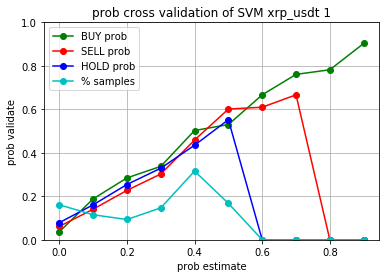

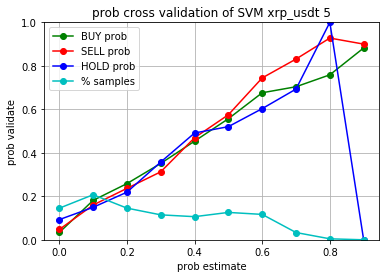

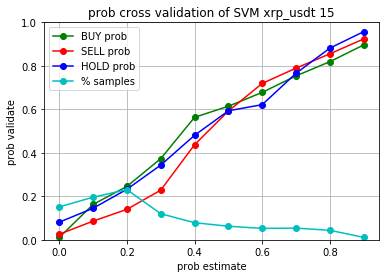

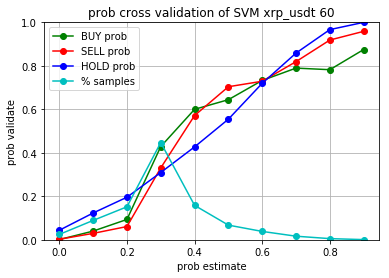

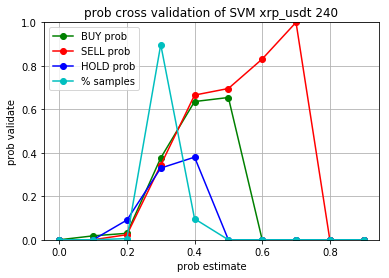

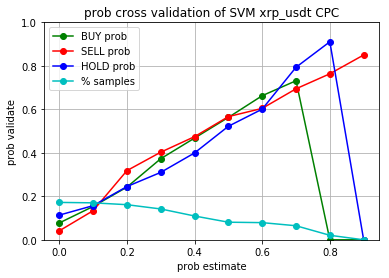

In [2]:
%load_ext autoreload
%autoreload 2
%run plot_crypto_classification.py



Recognizing crypto samples

An example showing how the scikit-learn can be used to classify crypto sell/buy actions.



classifier loaded from /Users/tc/tf_models/crypto/xrp_usdt.pydata
2019-03-06 19:48:05.450108: processing xrp_usdt
2019-03-06 19:48:05.450238: read tf vectors with 428161 tics x 6 aggregations from /Users/tc/Features/xrp_usdt.msg
xrp_usdt CPC total: before sequence reduction: buy 7548 sell 7548 hold 413065


KeyboardInterrupt: 

# Catalyst Frame


In [ ]:
import pytz
import pandas as pd
from datetime import datetime
from plot_crypto_classification import CpcSet, Cpc, PAIR
import targets_features as t_f

from catalyst.utils.run_algo import run_algorithm
from catalyst.protocol import BarData

def initialize(context):
    context.handle_count = 0
    print("init")
    context.cpcs = CpcSet(PAIR, t_f.DATA_PATH, '/Users/tc/tf_models/crypto')



def handle_data(context, data: BarData):
    
    if (context.handle_count < 1):
        catalyst2picklepandas(context, data)
#        feature_normalize(fn)

        context.handle_count = context.handle_count + 1
    return None
        

def analyze(context=None, results=None):
    pass

start = datetime(2018, 12, 18, 0, 0, 0, 0, pytz.utc)
# end = datetime(2018, 9, 24, 0, 0, 0, 0, pytz.utc)
end = datetime(2018, 12, 18, 0, 0, 0, 0, pytz.utc)
results = run_algorithm(initialize=initialize,
                        handle_data=handle_data,
                        analyze=analyze,
                        start=start,
                        end=end,
                        exchange_name='binance',
                        data_frequency='minute',
                        quote_currency ='usdt',
                        capital_base=10000 )

# Unused

# To be investigated